In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(
    {
        "font.weight": 'normal',
        "font.size": 14,
        "mathtext.fontset":'dejavusans',
        # "mathtext.cal": 'stix:italic'
    }
)

palette = sns.color_palette("tab10")
plot_params = {"lw":4, "markersize":12}

In [3]:
df = pd.read_pickle("save/comp_K/values_mnist_[1, 6]_gamma0.01_dim2000_lr0.01_e200_n100_MC3.pickle")
df["dis_gen"] = df["dis_risk"] - df["dis_emp"]
df["dis_gen_std"] = df["dis_risk_std"] + df["dis_emp_std"]
df["gen"] = df["risk"] - df["emp"]
df["gen_std"] = df["risk_std"] + df["emp_std"]
df = df.iloc[2:]
df

,dis_emp,dis_risk,emp,risk,dis_emp_std,dis_risk_std,emp_std,risk_std,bias,bias_std,dis_gen,dis_gen_std,gen,gen_std
10,0.080515,0.189426,0.002232,0.141120,0.004622,0.004928,0.000750,0.004903,0.079713,0.004827,0.108910,0.009550,0.138888,0.005653
15,0.063709,0.147011,0.002861,0.112388,0.004236,0.007639,0.000586,0.009804,0.062160,0.004457,0.083303,0.011875,0.109527,0.010391
25,0.049763,0.114402,0.004929,0.093590,0.005343,0.009761,0.000381,0.005616,0.047266,0.004581,0.064639,0.015104,0.088661,0.005997
35,0.043935,0.096323,0.005373,0.082360,0.002022,0.004156,0.000593,0.007808,0.041283,0.001742,0.052388,0.006178,0.076988,0.008401
50,0.039776,0.084905,0.006933,0.075169,0.001692,0.002080,0.001241,0.002252,0.035712,0.001507,0.045129,0.003772,0.068236,0.003493
75,0.035903,0.070785,0.010043,0.066136,0.001359,0.001037,0.001095,0.001674,0.029111,0.000654,0.034882,0.002395,0.056094,0.002769
100,0.034580,0.061529,0.012334,0.057090,0.001494,0.001691,0.000641,0.002818,0.025864,0.001023,0.026950,0.003185,0.044756,0.003460


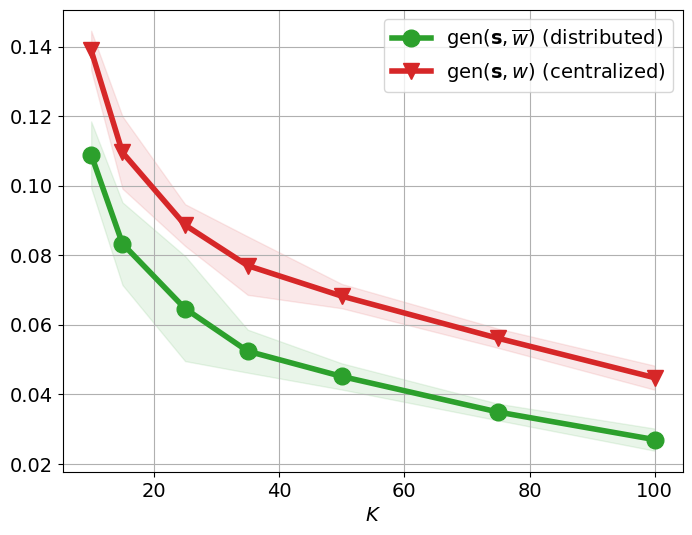

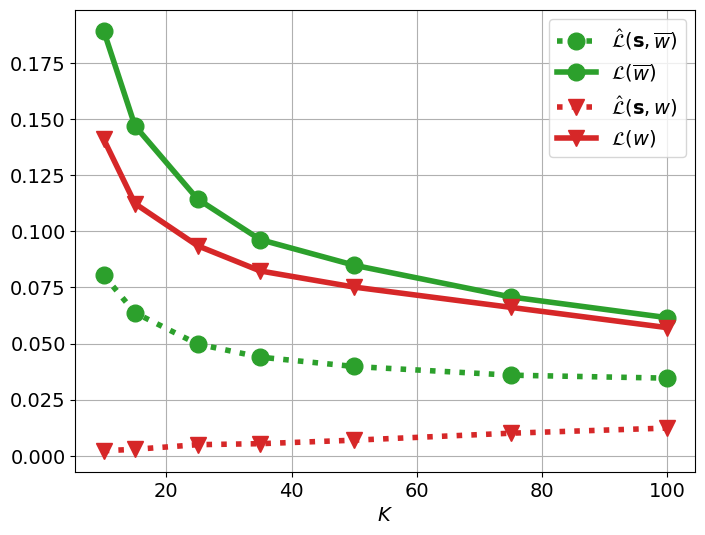

In [ ]:
xrange = df.index 

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(xrange, df["dis_gen"], label=r"$\operatorname{gen}(\mathbf{s}, \overline{w})$ (distributed)", marker='o', c=palette[2], **plot_params)
ax.plot(xrange, df["gen"], label=r"$\operatorname{gen}(\mathbf{s}, w)$ (centralized)", marker='v', c=palette[3], **plot_params)
ax.fill_between(xrange, df["dis_gen"] - df["dis_gen_std"], df["dis_gen"] + df["dis_gen_std"], alpha=0.1, color=palette[2])
ax.fill_between(xrange, df["gen"] - df["gen_std"], df["gen"] + df["gen_std"], alpha=0.1, color=palette[3])
ax.grid(which='both')
# ax.set_yscale("log")
# ax.set(xlabel=r"$K$", ylabel=r"$gen(s, \overline{w})$")
ax.set(xlabel=r"$K$")
ax.legend();

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(xrange, df["dis_emp"], marker='o', label=r"$\mathcal{\hat{L}}(\mathbf{s}, \overline{w})$", ls=":", c=palette[2], **plot_params)
ax.plot(xrange, df["dis_risk"], marker='o', label=r"$\mathcal{L}(\overline{w})$", c=palette[2], **plot_params)
ax.plot(xrange, df["emp"], marker='v', label=r"$\mathcal{\hat{L}}(\mathbf{s}, w)$", ls=":", c=palette[3], **plot_params)
ax.plot(xrange, df["risk"], marker='v', label=r"$\mathcal{L}(w)$", c=palette[3], **plot_params)
ax.grid(which='both')
# ax.set_yscale("log")
# ax.set(xlabel=r"$K$", ylabel=r"Risks")
ax.set(xlabel=r"$K$")
ax.legend();
